## Predicting the fruit name based on given data using KNN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fruits_df=pd.read_table('Fruit_pred.txt')

In [3]:
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits_df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [5]:
fruits_df['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [6]:
predct=dict(zip(fruits_df.fruit_label.unique(),fruits_df.fruit_name.unique()))
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
apple_data=fruits_df[fruits_df['fruit_name']=='apple']
orange_data=fruits_df[fruits_df['fruit_name']=='orange']
lemon_data=fruits_df[fruits_df['fruit_name']=='lemon']
mandarin_data=fruits_df[fruits_df['fruit_name']=='mandarin']

In [8]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [9]:
fruits_df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

<AxesSubplot:xlabel='width', ylabel='height'>

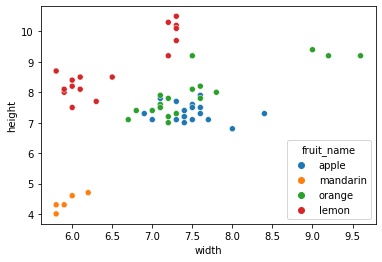

In [10]:
sns.scatterplot(x='width',y='height',hue='fruit_name',data=fruits_df)

<AxesSubplot:xlabel='mass', ylabel='color_score'>

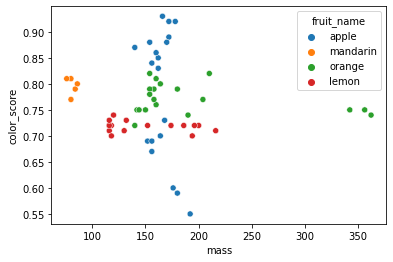

In [11]:
sns.scatterplot(x='mass',y='color_score',hue='fruit_name',data=fruits_df)

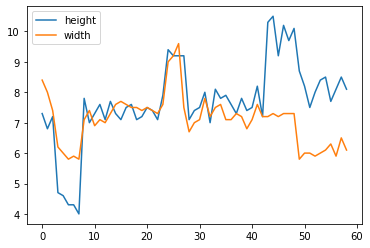

In [12]:
plt.plot(fruits_df['height'],label='height')
plt.plot(fruits_df['width'],label='width')
plt.legend()

In [13]:
X=fruits_df[['mass', 'width', 'height']]
y=fruits_df['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [14]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,44.0,159.090909,53.316876,76.0,127.500,157.0,172.50,356.0
width,44.0,7.038636,0.835886,5.8,6.175,7.2,7.50,9.2
height,44.0,7.643182,1.370350,4.0,7.200,7.6,8.25,10.5


In [15]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,15.0,174.933333,60.075508,84.0,146.00,166.0,185.00,362.0
width,15.0,7.300000,0.751190,6.0,7.10,7.2,7.45,9.6
height,15.0,7.840000,1.369463,4.6,7.25,7.6,8.15,10.3


In [16]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_test,y_test)

0.5333333333333333

In [18]:
fruits_df.shape

(59, 7)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((44, 3), (15, 3), (44,), (15,))

In [20]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

'lemon'

In [21]:
#example2
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

'orange'

Model has successfully predicted the fruit name based on three parameter i.e. mass,width,height

In [22]:
fruits_df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [23]:
#example3
prediction2=knn.predict([['120','7','9']])
predct[prediction2[0]]

'lemon'

In [24]:
X_train.columns

Index(['mass', 'width', 'height'], dtype='object')

In [28]:
X_test.columns

Index(['mass', 'width', 'height'], dtype='object')

In [33]:
y_train.head(5)

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

In [34]:
y_test.head(5)

26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

In [37]:
y_train.shape,y_test.shape,X_train.shape,X_test.shape

((44,), (15,), (44, 3), (15, 3))